#### 머신러닝 종류 
1. 지도학습
    - 문제(x)와 답(y)가 주어진 상태에서 학습
    - 분류, 회귀
        - 분류: 정답데이터(y)의 형태가 범주형 데이터일 때 
        - 회귀: 정답데이터(x)의 형태가 연속형 데이터일 때 
2. 비지도학습
    - 문제(x)에 대해서만 주어진 상태에서 학습
    - 데이터의 숨겨진 특성, 구조, 패턴을 파악 => 클러스터링(군집화)
3. 강화학습
    - 완전한 답을 제공하지 않음
    - 더 큰 보상을 얻을 수 있는 방향으로 학습을 진행
    - ex. 알파고

#### 머신러닝 단계
1. 문제정의
- 500명의 키, 몸무게 데이터를 통해서 비만도를 판별하는 모델 생성
- 분류모델 활용!
-> 6가지의 class로 분류하는 판별기를 만들어보자! 


In [1]:
# 필요한 라이브러리 불러오기!
import pandas as pd
import matplotlib.pyplot as plt

2. 데이터 수집
- csv 파일 불러오기

In [2]:
data = pd.read_csv('data/bmi_500.csv', index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


3. 데이터 전처리
- 결측치 대체 or 제거
- 이상치 대체 or 제거
- 변수 처리
- 데이터 split(train set과 test set을 분리)

In [4]:
# data의 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


4. EDA(탐색적 데이터 분석)
- 데이터의 특성 확인, 파악 
- 기술통계량(요약본), 데이터의 분포 파악, 시각화(main)

In [7]:
# 기술통계량(요약본) 확인 가능
# 수치형 데이터에 대해 요약본 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0


In [8]:
# object 형에 대해 기술통계량 확인
data.describe(include='object').T

,count,unique,top,freq
Gender,500,2,Female,255


In [13]:
# 정답데이터 확인하기(label)
data.index.unique()
# 총 6ea의 클래스를 가짐 
# 다중분류 : 6가지의 클래스 중에서 1개의 정답을 예측

# Extreme Obesity ; 고도비만
# Obesity : 비만
# Overweight : 과체중
# Nomal : 정상 
# Weak : 저체중
# Extremely Weak : 심한 저체중

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

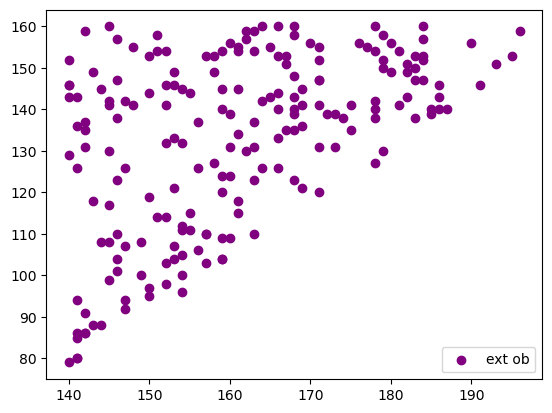

In [27]:
# 시각화 (bmi 레이블 별 분포 현황 시각화)
# 산점도(scatter)
# 고도비만에 대한 산점도를 그려보자 
EO = data.loc['Extreme Obesity']

EO['Height']
EO['Weight']

plt.scatter(EO['Height'], EO['Weight'], color='purple', label='ext ob')
plt.legend()
plt.show()

In [ ]:
# 같은 작업을 여섯번 동일하게 진행해서, 모든 클래스에 대한 산점도 그려보기 
# 힌트: 함수 활용

def scatter_all {
    
}

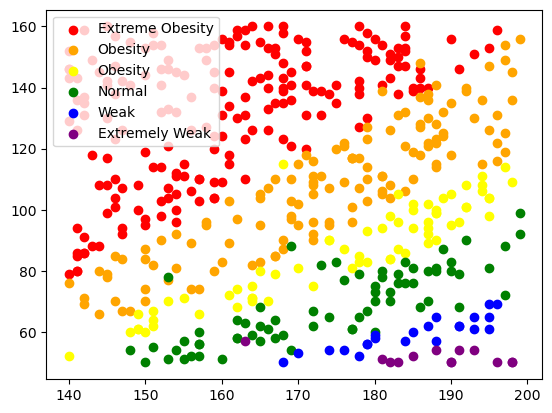

In [34]:
# 고도비만에 대한 산점도를 그려보자 
EO = data.loc['Extreme Obesity']
O = data.loc['Obesity']
OW = data.loc['Overweight']
N = data.loc['Normal']
W = data.loc['Weak']
EW = data.loc['Extremely Weak']

EO['Height']
EO['Weight']

O['Height']
O['Weight']

OW['Height']
OW['Weight']

N['Height']
N['Weight']

W['Height']
W['Weight']

EW['Height']
EW['Weight']



plt.scatter(EO['Height'], EO['Weight'], color='red', label='Extreme Obesity')
plt.scatter(O['Height'],O['Weight'], color='orange', label='Obesity')
plt.scatter(OW['Height'],OW['Weight'], color='yellow', label='Obesity')
plt.scatter(N['Height'],N['Weight'], color='green', label='Normal')
plt.scatter(W['Height'],W['Weight'], color='blue', label='Weak')
plt.scatter(EW['Height'],EW['Weight'], color='purple', label='Extremely Weak')

plt.legend()
plt.show()



In [39]:
# 함수를 만들어서 사용하는 방법 

def graph_draw(label, c):
    class_bmi = data.loc[label]
    plt.scatter(class_bmi['Height'], class_bmi['Weight'], 
                color=c, label=label)

In [36]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

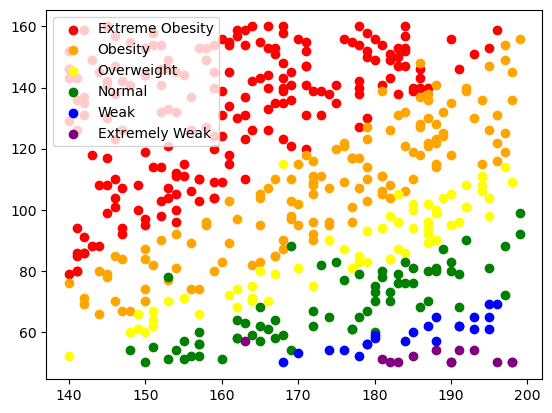

In [40]:
# 함수 호출하기 

graph_draw('Extreme Obesity', 'red')
graph_draw('Obesity', 'orange')
graph_draw('Overweight', 'yellow')
graph_draw('Normal', 'green')
graph_draw('Weak', 'blue')
graph_draw('Extremely Weak', 'purple')

plt.legend()
plt.show()

In [41]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [43]:
# 데이터 분리
# 문제 데이터(X)<= 거꾸로 : Height, Weight
# 정답 데이터(y)<= 우리가 맞춰야 하는 것: BMI = label
X = data[['Height', 'Weight']] # X(문제)= 대문자 => 문제 컬럼은 여러개(2차원), 정답 데이터인 시리즈는 1차원이기 때문에 각각 대문자, 소문자로 표현함 
y = data.index


In [44]:
X.shape, y.shape

((500, 2), (500,))

In [50]:
# train, test 분리
# 한정적인 데일 내에서 학습+평가까지 해야하기 때문에 
# train : 약 70% , test : 약 30% (ex. 7.5 : 2.5)

X_train = X.iloc[0:350] # 슬라이싱은 끝값을 포함하지 않음! 
y_train = y[0:350] #1차원이기 때문에 숫자로 인덱싱 가능

X_test = X.iloc[350:]
y_test = y[350:]

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

5. 모델 선택, 하이퍼파라미터 조정
- KNN 모델(실습용 모델)
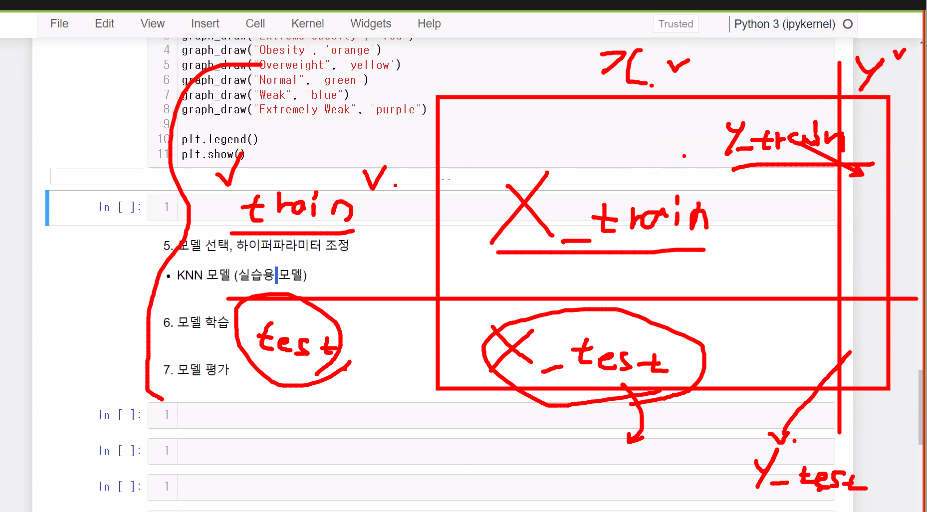

In [52]:
# 머신러닝 패키지 불러오기
from sklearn.neighbors import KNeighborsClassifier # KNN 분류모델
from sklearn.metrics import accuracy_score # 정확도 측정 도구

6. 모델 학습
    - fit() : 모델 학습

In [53]:
# 모델 객체 생성(모델 초기화)
knn = KNeighborsClassifier()
# 모델 생성만 한 것 !  

In [54]:
# 모델 학습
# fit(훈련용 문제, 훈련용 답)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# 모델 예측
# predict(테스트용 문제) : 예측을 수행
pre = knn.predict(X_test)

7. 모델 평가

In [57]:
# acc(실제값, 예측값)
accuracy_score(y_test, pre)

0.9066666666666666

### 머신러닝 구조

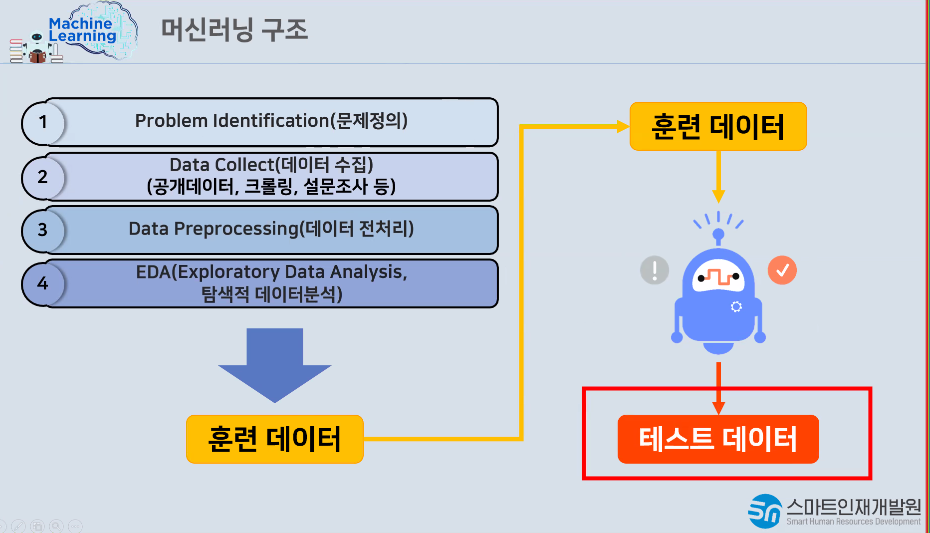

- 과소적합
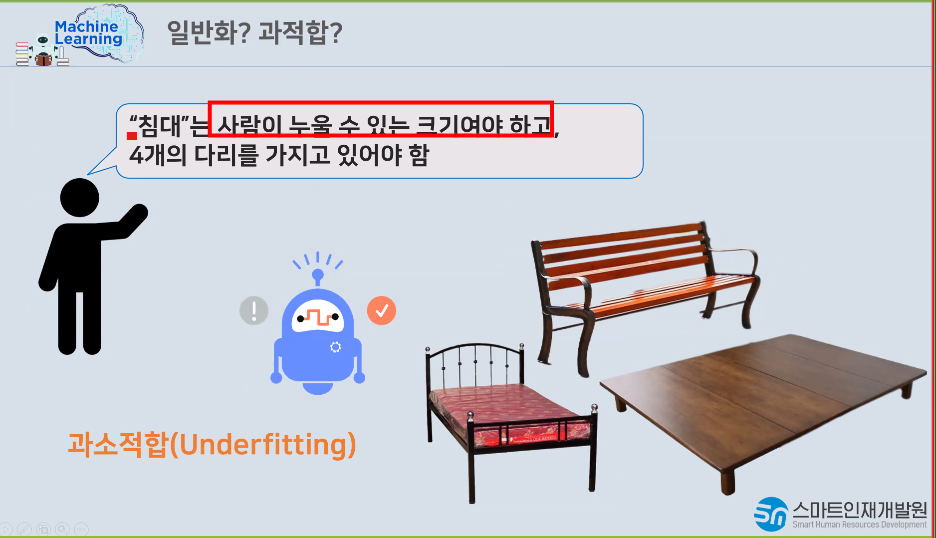

- 과대적합: 훈련 데이터가 불균형
        : 특정 분야를 필요 이상으로 학습
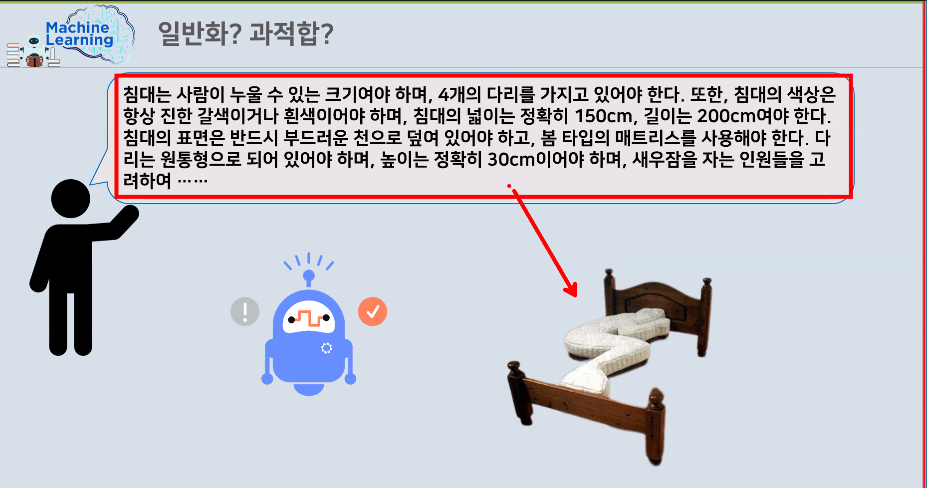

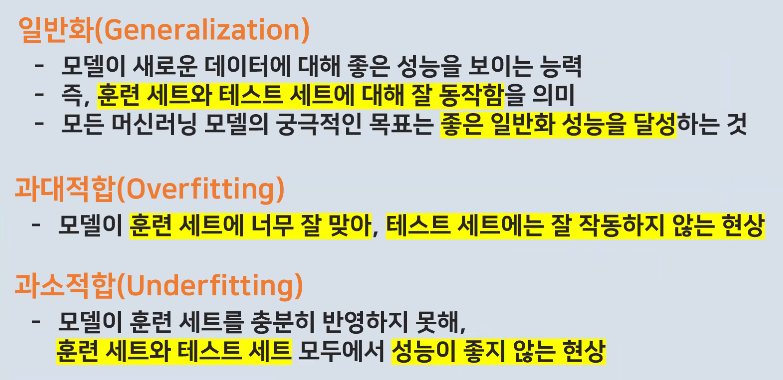

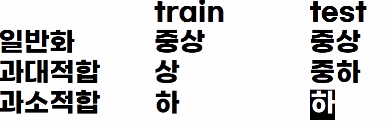
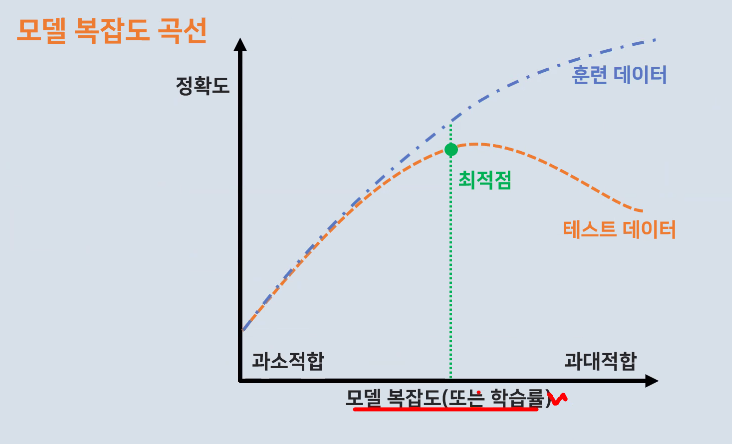
1) 과소적합 원인
- 모델의 복잡도가 낮음
- 특성(feature)가 충분하지 않음
- 적은 학습 데이터 또는 학습 시간

2) 과대적합 원인
- 모델의 복잡도가 너무 높음
- 적은 양의 훈련데이터로 복잡한 모델 학습 시, 훈련데이터에 과도하게 최적화 될 수 있음
- 데이터 불균형
- 노이즈 데이터(이상치, 결측치)가 많음

=> 해결방안
1) 일반적으로 데이터 양이 많으면 일반화에 도움이 됨
2) 편증된 데이터보다 다양성이 보장된 데이터 확보
3) 가중치에 대한 규제(Regularization) 적용